# Исследование рынка заведений общественного питания Москвы

## Ход работы
1. Подготовка исходных данных.
2. Исследование соотношения видов объектов общественного питания.
3. Исследование соотношения сетевых и не сетевых объектов общественного питания.
4. Характеристика сетевых объектов общественного питания.
5. Характеристика видов объектов общественного питания по количеству посадочных мест.
6. Определение улиц и районов, в которых они расположены, с наибольшим числом заведений.
7. Определение улиц и районов, в которых они расположены, с наименьшим числом заведений.
8. Распределение количества посадочных мест для улиц с наибольшим числом заведений.
9. Подготовка рекомендаций и презентации о перспективном виде заведения, количестве посадочных мест и районе расположения.

## Описание данных
Таблица <b>rest_data</b> (информация о заведениях):
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

In [1]:
#импортируем библиотеки
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_palette('husl')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings('ignore')
from io import BytesIO
import requests

In [2]:
#загрузим датафрейм, укажем знаков после запятой и что первая строка является заголовком
rest_data = pd.read_csv('/datasets/rest_data.csv')
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Выведем основную информацию о таблице

In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропусков нет, столбцы с числами имеют корректный формат

In [4]:
# проверим столбцы на артефакты
rest_data.describe()

,id,number
count,"15,366.00","15,366.00"
mean,"119,720.07",59.55
std,"73,036.13",74.74
min,838.00,0.00
25%,"28,524.00",12.00
50%,"144,974.50",40.00
75%,"184,262.25",80.00
max,"223,439.00","1,700.00"


В таблицу попала запись с нулевым количеством посадочных мест. Нужно будет позже рассмотреть ее подробнее.

In [5]:
# посмотрим количество уникальных вхождений по типам заведений
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Повторяющихся типов нет. Но в списке объектов есть отдел кулинарии - возможно в нем как раз и не будет посадочных мест.

In [6]:
# убедимся, что в стоблце с признаком сетевого заведения только значения да/нет
rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [7]:
# посмотрим количество уникальных вхождений по именам заведений
print('Исходная таблица содержит', rest_data['object_name'].nunique(), 'уникальных наименований')

Исходная таблица содержит 10393 уникальных наименований


In [8]:
# проверим наличие явных дубликатов
print ('Дубликатов в таблице:', rest_data.duplicated().sum())

Дубликатов в таблице: 0


Проверим название на неявные дубликаты.Сетевые заведения должны иметь одинаковое наименование. Выведем список уникальных названий сетевых заведений.

In [9]:
print('Исходная таблица содержит', rest_data.query('chain == "да"')['object_name'].nunique(), 'уникальных наименования сетевых заведений')

Исходная таблица содержит 724 уникальных наименования сетевых заведений


In [10]:
#изучим список уникальных значений
rest_data.query('chain == "да"')['object_name'].unique()

array(['ПИЦЦЕТОРИЯ', 'Брусника', 'Алло Пицца', 'Суши Wok', 'Тануки',
       "Домино'с Пицца", 'Готика', 'Му-Му', 'Хлеб насущный', 'TAJJ MAHAL',
       'ДАНКИН ДОНАТС', 'Вареничная №1', 'ШОКОЛАДНИЦА', 'Теремок',
       'Хинкальная', 'Шантимель', 'ТАНУКИ', 'Шоколадница', 'МУ-МУ',
       'Хинкальная City', 'КРУЖКА', 'СУШИ ВОК', 'ПРИМАВЕРА', 'Виктория',
       'Пиццерия «АКАДЕМИЯ»', 'Чебуречная СССР', 'МАКДОНАЛДС',
       'Grand Cru', 'Чайхона №1', 'Панчо Пицца', 'KFC', 'Сабвей',
       'ресторан «Якитория»', 'Советские времена', 'Кафе «Андерсон»',
       'Кафе «Subway»', 'Ресторан «Макдоналдс»', 'Суши Сет', 'Суши WoK',
       'Шоколад', 'Тирольские пироги', 'Гамбринус', 'Пицца Фабрика',
       'Subway', 'Кафе «Якитория»', 'Кафе «Тануки»', 'Сити Пицца',
       'Кружка', 'Кофе Хаус',
       'Кулинарная Лавка Братьев Караваевых Братья Караваевы', 'Суши Вок',
       'Прайм', 'Пицца Экспресс', 'Шоколадница Кофе Хаус', 'Николай',
       'Якитория', 'МАГНОЛИЯ', 'КОФЕ С СОБОЙ', 'Джаганнат', 'Волк

В названиях встречается вид заведения. Удалим его. Добавим новое название в отдельный столбец.

In [11]:
#сначала приведем все в нижний регистр
rest_data['object_new_name'] = rest_data['object_name'].str.lower()

#удалим типы заведений из названий
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('кафе |ресторан |столовая |предприятие быстрого обслуживания |бар |магазин-кулинария |закусочная |кафетерий |буфет |кофейня |быстрого питания |пекарня ', '')

In [12]:
#удалим французские кавычки
rest_data['object_new_name'] = rest_data['object_new_name'].str.replace('«|»', '')

In [13]:
rest_data['object_new_name']

0                сметана
1                 родник
2               академия
3             пиццетория
4        вишневая метель
              ...       
15361        шоколадница
15362        шоколадница
15363        шоколадница
15364        шоколадница
15365        шоколадница
Name: object_new_name, Length: 15366, dtype: object

In [14]:
#изучим список уникальных значений
rest_data.query('chain == "да"')['object_new_name'].unique()

array(['пиццетория', 'брусника', 'алло пицца', 'суши wok', 'тануки',
       "домино'с пицца", 'готика', 'му-му', 'хлеб насущный', 'tajj mahal',
       'данкин донатс', 'вареничная №1', 'шоколадница', 'теремок',
       'хинкальная', 'шантимель', 'хинкальная city', 'кружка', 'суши вок',
       'примавера', 'виктория', 'пиццерия академия', 'чебуречная ссср',
       'макдоналдс', 'grand cru', 'чайхона №1', 'панчо пицца', 'kfc',
       'сабвей', 'якитория', 'советские времена', 'андерсон', 'subway',
       'суши сет', 'шоколад', 'тирольские пироги', 'гамбринус',
       'пицца фабрика', 'сити пицца', 'кофе хаус',
       'кулинарная лавка братьев караваевых братья караваевы', 'прайм',
       'пицца экспресс', 'шоколадница кофе хаус', 'николай', 'магнолия',
       'кофе с собой', 'джаганнат', 'волконский', 'moskalyan',
       'гино-но-таки', 'тратория semplice', 'ньокки', 'хижина',
       'додо пицца', 'крошка картошка', 'бургер кинг', 'папа джонс',
       'кондитерская волконский', 'бар- нико

In [15]:
#для наиболее часто встречающихся дубликатов составим список словарей 

duplicates = {'теремок': ['пбо теремок', 'теремок инвест', 'теремок-инвест'],
             'prime' : ['prime (прайм стар)', 'prime star прайм стар', 'prime прайм стар', 'prime прайм стар прайм-кафе'],
             'starbucks' : ['starbucks coffee', 'starbucks кофе', 'starbucks старбакс', 'starbucks, старбакс кофе', 'старбакс', 'старбакс starbucks', 'старбакс кофе'],
             'kfc' : ['ростикс kfc', 'пбо kfc покрышкина', 'пбо kfc', 'kfc волгоградский', 'fridays kfc'],
             'мята lounge': ['мята lounge октябрьская', 'мята', 'кальянная мята lounge', 'лаундж-мята lounge', 'мята lounge автозаводская', 'кальян-мята lounge', 'кальян- мята lounge', 'кальян-moskalyan', 'мята lounge шаболовка'],
             'costa coffee' : ['коста кофе', 'брава коста кофе'],
             'кофе хаус' : ['кофе хаус,экспресс', 'кофе хаус. экспрессо и капучино бар'],
             'братья караваевы' : ['братья караваевых', 'кулинарная лавка братьев караваевых', 'кулинарная лавка братьев караваевых братья караваевы'],
             'иль патио' : ['иль патио il patio', 'иль патио планета суши', 'кулинарная лавка братьев караваевых братья караваевы'],
             'якитория' : ['якитория и спорт бар'],
             'сабвей' : ['сабвей subway', 'subway'],
             'coffeeshop' : ['coffeeshop company', 'кофешоп coffeeshop company'],
             'нияма' : ['нияма пицца пи', 'нияма. пицца пи'],
             'папа джонс' : ['папа джонс пицца', 'пицерия папа джонс', 'пиццерия папа джонс'],
             'штолле' : ['пироги штолле', 'пироговая штолле'],
             'волконский' : ['волконский пекарня', 'кафе-пекарея волконский', 'кондитерская волконский', 'кондитерская-волконский'],
             'бургер кинг' : ['кафе-бургер кинг', 'бургер кинг burger king'],
             'krispy creme' : ['krispy krem'], 
             'ванвок' : ['van wok ванвок', 'vanwok ванвок'], 
             'андерсон' : ['детский клуб андерсон', 'детское андерсон', 'семейное андерсон', 'семейное и кондитерская андерсон'],
             'макдональдс' : ['москва - макдоналдс', 'ресторанмакдоналдс'],
             'милти' : ['точка продажи готовой еды милти', 'магазин готовой еды милти', 'готовые блюда милти']
             }

#напишем функцию для замены дубликатов на основное имя
def change_duplicates(value):
    for name, double in duplicates.items():
        if value in double: return name
    return value

rest_data['object_new_name'] = rest_data['object_new_name'].apply(change_duplicates)

In [16]:
#проверим все изменения
print('Таблица содержит', rest_data.query('chain == "да"')['object_new_name'].nunique(), 'уникальных наименования сетевых заведений')

Таблица содержит 372 уникальных наименования сетевых заведений


In [17]:
#проверим, что сетевые заведения - действительно сетевые
check_chain = (
    rest_data.query('chain == "да"')
    .groupby('object_new_name')['object_name']
    .count()
    .reset_index()
    .sort_values(by='object_name')
)
check_chain

,object_new_name,object_name
0,beverly hills diner,1
137,домашнее сеть городских кафе,1
139,"домино'с пицца domino,s pizza",1
295,старина миллер,1
294,стардогс стардогs,1
...,...,...
316,теремок,111
91,бургер кинг,159
194,макдоналдс,171
358,шоколадница,183


Некоторые из уникальных наименований встречаются в единичном экземпляре. Приравняем их к несетевым заведениям.

In [18]:
#сделаем список для сверки
check_chain_no = check_chain[check_chain['object_name'] == 1]['object_new_name'].tolist()

In [19]:
#при помощи loc заменим значения
rest_data.loc[rest_data['object_new_name'].isin(check_chain_no), 'chain'] = 'нет'

Проверим в обратную сторону - не встречаются ли названия сетевых заведений среди не сетевых

In [20]:
#сделаем список
check_chain_yes = check_chain[check_chain['object_name'] != 1]['object_new_name'].tolist()

In [21]:
print('Признак "нет" у', rest_data[rest_data['chain'] == 'нет']['object_new_name'].isin(check_chain_yes).sum(), 'сетевых заведений')

Признак "нет" у 126 сетевых заведений


Заведения с идентичными названиями в таблице имеют как "да" в сетевом признаке, так и "нет". Возможно, с признаком "нет" - это объекты, работающие по франшизе. С точки зрения потребителя такие объекты не отличаются от сетевых. Исправим для них признак на "да".

In [22]:
#исправим при помощи loc
rest_data.loc[rest_data['object_new_name'].isin(check_chain_yes), 'chain'] = 'да'

In [23]:
#итоговые изменения
print('Итог: осталось', rest_data.query('chain == "да"')['object_new_name'].nunique(), 'уникальное наименование сетевых заведений')

Итог: осталось 191 уникальное наименование сетевых заведений


### Вывод
1. В исходной таблице названия столбцов корректны.
2. Пропущенных значений нет, столбцы имеют корректный формат.
3. Повторяющихся значений в списке видов заведений нет. Столбец, содержащий признак сети, содержит только два значения.
4. Явных дубликатов нет.
5. Среди названий сетевых заведений встречаются неявные дубликаты: имеются проблемы с регистром в названиях, кавычками, добавленными типами заведений в названия, добавленной географической привязкой в названиях (район, метро), транслитерацией названий.
6. Был создан новый столбец, в который были записаны названия срочными буквами, удалены из названий типы заведений, удалены французские кавычки, для Макдональдса по маске заменены названия, для наиболее часто встречающихся дубликатов проведены замена на синонимы через список словарей.
7. Были исправлены признаки для сетей: имеющих только 1 заведение - признак сети установен на "нет"; для наименований из списка сетевых заведений исправлен признак "да".
8. В результате предобработки из 724 уникальных наименований сетей было оставлено 191 наименование.

## Соотношение сетевых и несетевых заведений

Построим графики соотношений между сетевыми и несетевыми заведениями.

In [24]:
#посчитаем долю каждого вида заведений от общего числа
rests_by_type = (
    rest_data.groupby('object_type')
    .agg({'id':'count','number':'mean'})
    .reset_index()
    .rename(columns={'id':'counts'})
)
all_rests = rests_by_type['counts'].sum()
all_numbers = rests_by_type['number'].sum() 
rests_by_type['% names'] = rests_by_type['counts'] / all_rests *100
rests_by_type['% numbers'] = rests_by_type['number'] / all_numbers *100
rests_by_type.style.background_gradient('Blues')

,object_type,counts,number,% names,% numbers
0,бар,856,43.494159,5.570741,10.758044
1,буфет,585,51.129915,3.807107,12.646707
2,закусочная,360,7.608333,2.342835,1.881880
3,кафе,6099,39.716019,39.691527,9.823542
4,кафетерий,398,9.123116,2.590134,2.256553
5,магазин (отдел кулинарии),273,5.589744,1.776650,1.382593
6,предприятие быстрого обслуживания,1923,20.552262,12.514643,5.083490
7,ресторан,2285,96.834136,14.870493,23.951398
8,столовая,2587,130.246618,16.835871,32.215794


Почти 40% от всех заведений питания составляют кафе. А больше всего мест в столовых.

### График распределения по видам заведений

Воспользуемся даннными из сводной таблицы и построим график.

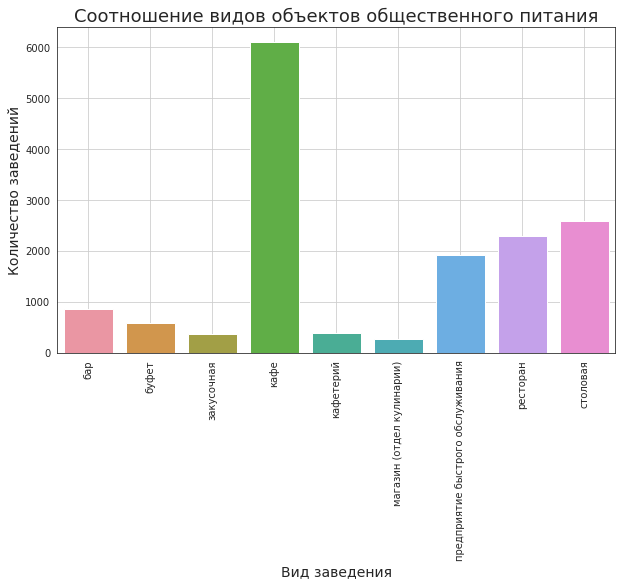

In [25]:
#построим график
plt.figure(figsize=(10,6))
sns.barplot(x='object_type',
            y='counts',
            data=rests_by_type)
plt.grid(True)
plt.title('Соотношение видов объектов общественного питания', fontsize=18)
plt.ylabel('Количество заведений', fontsize=14)
plt.xlabel('Вид заведения', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Наиболее распространненым видом предпритий общественного питания является кафе. Далее в порядк убывания по количеству объектов следуют столовые, рестораны, фастфуды.

### График соотношения видов и распределения по сетевому признаку

In [26]:
#сгруппируем заведения по видам и сетевому признаку и сохраним в новой переменной
group_by_chain = (
    rest_data.groupby(['chain', 'object_type'])['object_new_name'].count()
             .reset_index()
             .rename(columns={'object_new_name':'counts'})
             .merge(rest_data.groupby('object_type')['chain'].count(), on='object_type', suffixes=('','_all'))
             .sort_values(by='chain')
            )
group_by_chain['% of all'] = round((group_by_chain['counts'] / group_by_chain['chain_all']) * 100)
group_by_chain = group_by_chain.drop('chain_all', axis=1)
group_by_chain.style.background_gradient('Blues', axis=0)            

,chain,object_type,counts,% of all
0,да,бар,33,4.000000
14,да,ресторан,506,22.000000
12,да,предприятие быстрого обслуживания,784,41.000000
10,да,магазин (отдел кулинарии),75,27.000000
16,да,столовая,5,0.000000
6,да,кафе,1397,23.000000
8,да,кафетерий,49,12.000000
4,да,закусочная,51,14.000000
2,да,буфет,13,2.000000
7,нет,кафе,4702,77.000000


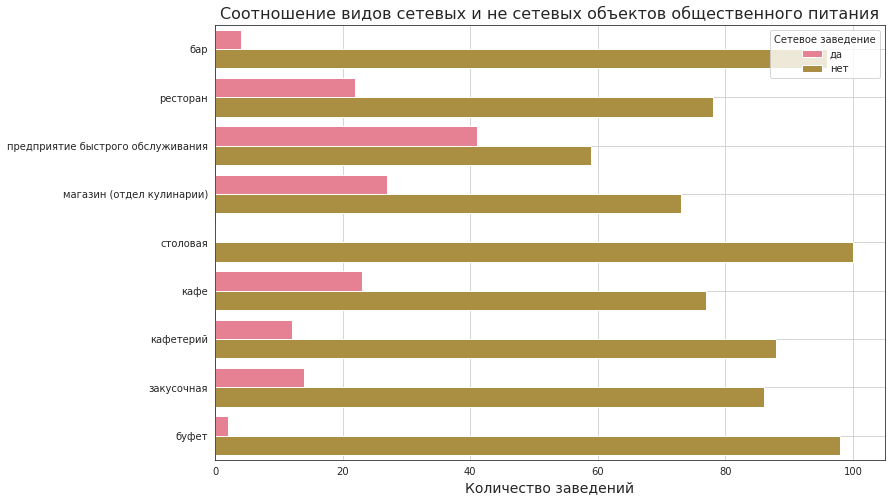

In [27]:
#построим график
plt.figure(figsize=(12,8))
sns.barplot(y='object_type',
            x='% of all',
            hue='chain',
            data=group_by_chain
            )
plt.grid(True)
plt.title('Соотношение видов сетевых и не сетевых объектов общественного питания', fontsize=16)
plt.ylabel('')
plt.legend(title='Сетевое заведение')
plt.xlabel('Количество заведений', fontsize=14)
plt.show()

В обеих категориях (сетевые/не сетевые) наиболее многочисленной группой является кафе. Сетевое распространение также характерно для фастфудов, ресторанов и отделов кулинарии. Доля остальных видов сетевых заведений составляет менее 15% от общего количества заведений данного вида. Сетевых столовых почти не существует - их всего 5 штук.

### Вывод
Данные сводной таблицы, а также график соотношения сетевых и несетевых объектов общественного питания по количеству указывают, что для кафе, предприятий быстрого обслуживания, отделов кулинарии и ресторанов характерно сетевое распространение. Кафе является самым распространенным видом заведений в обеих группах. Среди несетевых заведений наиболее многочисленными группами являются столовые, бары и буфеты.

##  Анализ сотношения мест и объектов по сетевым заведениям

Подготовим две переменные - посчитаем количество заведений по каждой сети, среднее количество посадочных мест. Затем определим категории для сетей - много/мало заведений и много/мало в среднем посадочных мест. Выясним, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест.

In [28]:
#сохраним сетевые рестораны в отдельную переменную
chain_rests = rest_data.query('chain == "да"')

Учтем, что на предыдущем шаге мы выяснили, что сетевое распространение характерно только для 4 видов заведений. Сделаем срез по ним.

In [29]:
chain_rests_favorite = chain_rests.query('object_type in ["кафе","ресторан","предприятие быстрого обслуживания", "магазин (отдел кулинарии)"]')

### Количество заведений по сетям

In [30]:
#сгруппируем данные по сетям и количеству заведений
qty_chain_rests = (
    chain_rests_favorite.groupby(by='object_new_name')
    .agg({'id': 'count'})
    .sort_values(by='id', ascending=False)
    .reset_index()
)
qty_chain_rests.head(10)

,object_new_name,id
0,kfc,188
1,шоколадница,185
2,макдоналдс,171
3,бургер кинг,155
4,теремок,107
5,домино'с пицца,91
6,крошка картошка,90
7,милти,73
8,суши wok,69
9,папа джонс,66


In [31]:
qty_chain_rests.describe()

,id
count,190.00
mean,14.54
std,29.42
min,1.00
25%,2.00
50%,5.00
75%,10.00
max,188.00


Максимальное число заведений в одной сети - 188. В топе сетей с наибольшим числом заведений всего 5 имеют больше 100 объектов. При этом среднее число - это 14. Посчитаем, сколько сетей имеют более 14 объектов.

In [32]:
print('Больше 14 объектов имеют:', qty_chain_rests[qty_chain_rests['id'] > 14]['object_new_name'].count(), 'сетей')

Больше 14 объектов имеют: 36 сетей


14 и более заведений имеют 18% сетей. Попробуем немного снизить порог. Посчитаем количество сетей, у которых более 5 объектов (медиана).

In [33]:
print('Больше 5 объектов имеют:', qty_chain_rests[qty_chain_rests['id'] > 5]['object_new_name'].count(), 'сетей')

Больше 5 объектов имеют: 86 сетей


### Среднеее число посадочных мест

In [34]:
#для каждой сети посчитаем среднее число посадочных мест
mean_chain_rests = chain_rests_favorite.pivot_table(index='object_new_name', values='number', aggfunc='median').sort_values(by='number', ascending=False).reset_index()
mean_chain_rests

,object_new_name,number
0,пилзнер,245.00
1,старина мюллер старина миллер,215.00
2,ян примус,210.00
3,бакинский бульвар,186.00
4,торро гриль,175.00
...,...,...
185,кофе с собой,0.00
186,wokker,0.00
187,милти,0.00
188,lavkalavka,0.00


In [35]:
#изучим описание новой переменной
mean_chain_rests.describe()

,number
count,190.00
mean,54.28
std,45.68
min,0.00
25%,20.00
50%,41.75
75%,86.38
max,245.00


In [36]:
print('0 мест имеют:', mean_chain_rests[mean_chain_rests['number'] == 0]['object_new_name'].count(),  'сетей')

0 мест имеют: 8 сетей


Проверим, сколько сетей имеют среднее число посадочных мест больше среднего значения и медианы.

In [37]:
#по среднему
print('Больше 55 посадочных мест в среднем имеют:', mean_chain_rests[mean_chain_rests['number'] > 55]['object_new_name'].count(), 'сетей')

Больше 55 посадочных мест в среднем имеют: 72 сетей


In [38]:
#по медиане
print('Больше 42 посадочных мест в среднем имеют:', mean_chain_rests[mean_chain_rests['number'] > 50]['object_new_name'].count(), 'сетей')

Больше 42 посадочных мест в среднем имеют: 74 сетей


Медианное значение и  среднее значения - имеют примерно одинаковое количество сетей.

### Сравнение по видам сетевых заведений и числу мест

In [39]:
chain_rests_favorite_grouped = (
    chain_rests_favorite.groupby('object_type').agg({'id':'count','number':'mean'})
    .reset_index()
    .rename(columns={'id':'counts'})
)
chain_rests_favorite_grouped['ratio'] = chain_rests_favorite_grouped['counts'] / chain_rests_favorite_grouped['number']
chain_rests_favorite_grouped.style.background_gradient('Blues', axis=0)      

,object_type,counts,number,ratio
0,кафе,1397,46.884037,29.796922
1,магазин (отдел кулинарии),75,8.933333,8.395522
2,предприятие быстрого обслуживания,784,40.321429,19.443756
3,ресторан,506,97.958498,5.165453


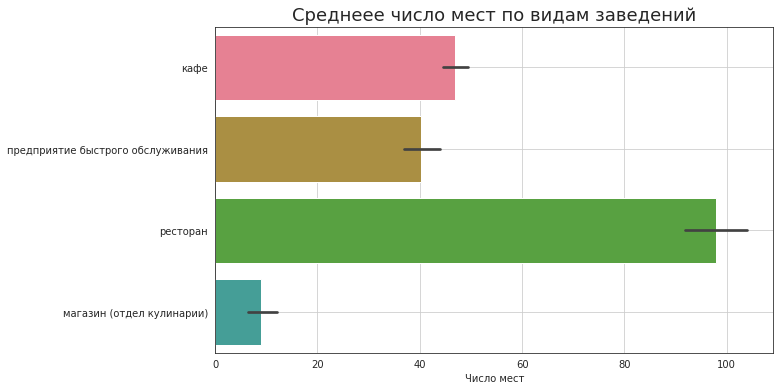

In [40]:
#построим график распределения среднего числа мест в сетевых заведениях
plt.figure(figsize=(10,6))
sns.barplot(y='object_type',
            x='number',
            data=chain_rests_favorite )
plt.grid(True)
plt.title('Cреднеее число мест по видам заведений', fontsize=18)
plt.xlabel('Число мест')
plt.ylabel('')
plt.show()

В среднем, в ресторанах больше мест, но меньше заведений. Для кафе и фастфудов характерно обратное разделение - меньше посадочных мест, но больше заведений. Исходя из графика, в ресторанах в средмеи около 100 мест, в кафе чуть больше 40.

### Категоризация сетевых заведений

In [41]:
#объединим все данные о сетевых объектах по названиям, видам сетевых заведений
chain_rest_merged = (
    chain_rests_favorite.groupby(['object_new_name'])
    .agg({'id':'count', 'number':'mean'})
    .reset_index()
    .rename(columns={'id':'counts', 'number':'mean_number'})
)

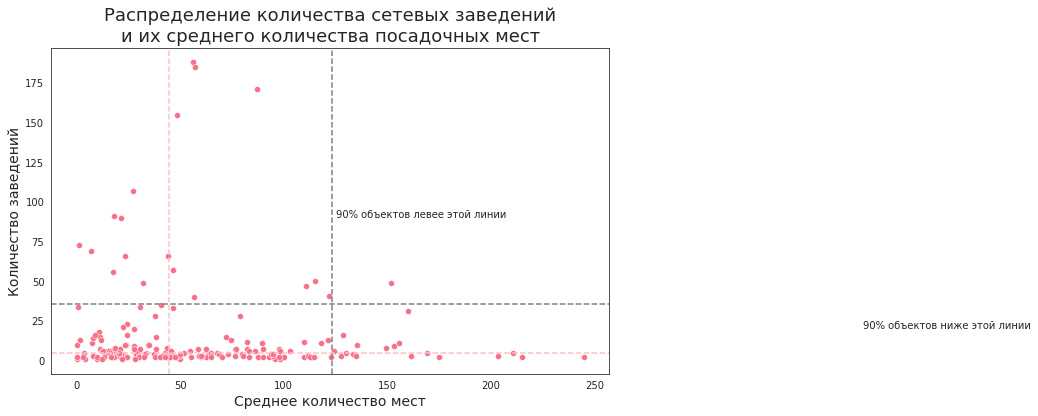

In [42]:
#построим график
plt.figure(figsize=(10,6))
sns.scatterplot(data=chain_rest_merged, x="mean_number", y="counts")
plt.title('Распределение количества сетевых заведений\nи их среднего количества посадочных мест', fontsize=18)
plt.xlabel('Среднее количество мест', fontsize=14)
plt.ylabel('Количество заведений', fontsize=14)
plt.axhline(np.percentile(chain_rest_merged['counts'], 90), linestyle='--', color='grey')
plt.axvline(np.percentile(chain_rest_merged['mean_number'], 90), linestyle='--', color='grey')
plt.text(380, 20, '90% объектов ниже этой линии')
plt.text(125, 90, '90% объектов левее этой линии')
plt.axhline(np.percentile(chain_rest_merged['counts'], 50), linestyle='--', color='pink')
plt.axvline(np.percentile(chain_rest_merged['mean_number'], 50), linestyle='--', color='pink')
plt.show()

График говорит о том, что, чаще всего, в сетевых заведениях около 5 объектов и около 40 посадочных мест.

Разобьем все сетевые заведения на 4 категории в зависимости от количества ресторанов и среднего количества посадочных мест. В качестве границы будем использовать медианное значение.

In [43]:
#напишем функцию, которая будет сравнивать данные о среднем количестве мест и количестве заведений и присваивать категорию по условиям
def chain_rests_cat(chainrest):
    
    #зададим переменные для сравнения (возьмем средние значения)
    objects = 5 
    numbers = 42
    
    #если название ресторана попадает в две категории - присвоить значение в новой столбец
    if chainrest['counts'] > objects and chainrest['mean_number'] > numbers :
        return 'много заведений - много мест'
    if chainrest['counts'] > objects and chainrest['mean_number'] <= numbers :
        return 'много заведений - мало мест'    
    if chainrest['counts'] <= objects and chainrest['mean_number'] > numbers :
        return 'мало заведений - много мест' 
    return 'мало заведений - мало мест' 

# применим функцию в новом столбце
chain_rest_merged['chain_groupes'] = chain_rest_merged.apply(chain_rests_cat, axis=1) 

chain_rest_merged # проверим работу

,object_new_name,counts,mean_number,chain_groupes
0,bocconcino,5,64.00,мало заведений - много мест
1,burger club,3,20.33,мало заведений - мало мест
2,coffeeshop,6,45.67,много заведений - много мест
3,cofix,18,10.94,много заведений - мало мест
4,correas,5,42.80,мало заведений - много мест
...,...,...,...,...
185,штолле,20,27.65,много заведений - мало мест
186,якитория,50,115.28,много заведений - много мест
187,ян примус,3,203.33,мало заведений - много мест
188,япоша,4,94.75,мало заведений - много мест


In [44]:
#посмотрим статистику по группам
(
    chain_rest_merged.groupby(by='chain_groupes')['chain_groupes']
    .agg('count')
    .to_frame()
    .style.background_gradient('Blues')
)

,chain_groupes
chain_groupes,
мало заведений - мало мест,46
мало заведений - много мест,58
много заведений - мало мест,43
много заведений - много мест,43


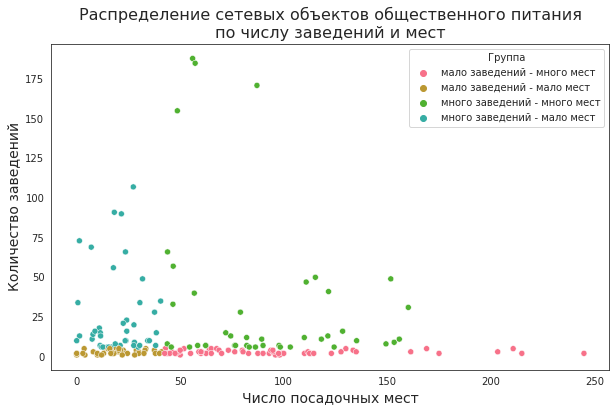

In [45]:
#построим график распределения
plt.figure(figsize=(10,6))
sns.scatterplot(x='mean_number', y='counts', data=chain_rest_merged, hue='chain_groupes')
plt.title('Распределение сетевых объектов общественного питания\nпо числу заведений и мест', fontsize=16)
plt.xlabel('Число посадочных мест', fontsize=14)
plt.legend(title='Группа')
plt.ylabel('Количество заведений', fontsize=14)
plt.show()

### Вывод
В результате исследования, сетевые заведения были разделены примерно на равные по количеству вошедших в них сетей, группы - мало заведений - мало мест (46 сетей), мало заведений - много мест (58 сетей), много заведений - мало мест (43 сети), много заведений - много мест (43 сети). <br>
Из графика распределения видно, что существуют отдельные выбросы - сети с большим числом заведений и мест. В другой группе сетей с большим числом заведений, но с меньшим количеством мест - количество заведений более разнообразно внутри группы.<br>
Для сетевых заведений характерно небольшое количество заведений (до 5) и большое число мест (до 45).<br>
В ресторанах больше мест, но меньше заведений. Для остальных трех видов характерно обратное разделение - меньше посадочных мест, но больше заведений.

## Среднее количество посадочных мест по видам объектов

Определим среднее количество посадочных мест по видам заведений.

In [46]:
#сохраним в переменную сводную таблицу со средним числом мест по видам заведений
object_types = (
    rest_data.pivot_table(
        index='object_type', 
        columns='chain', 
        values='number', 
        aggfunc='mean', 
        margins=True)
)
object_types.style.background_gradient('Blues')

chain,да,нет,All
object_type,,,
бар,51.424242,43.176185,43.494159
буфет,10.846154,52.045455,51.129915
закусочная,14.745098,6.430421,7.608333
кафе,46.884037,37.586346,39.716019
кафетерий,11.959184,8.724928,9.123116
магазин (отдел кулинарии),8.933333,4.323232,5.589744
предприятие быстрого обслуживания,40.321429,6.944688,20.552262
ресторан,97.958498,96.514334,96.834136
столовая,175.400000,130.159179,130.246618


По данным сводной таблицы в сетевых и несетевых заведениях, наибольше среднее количество посадочных мест по всем видам объектов у столовых и ресторанов - оно значительно превышает среднее число по сумме всех имеющихся в таблице видов.

### Диаграмма среднего количества посадочных мест по разным видам заведений

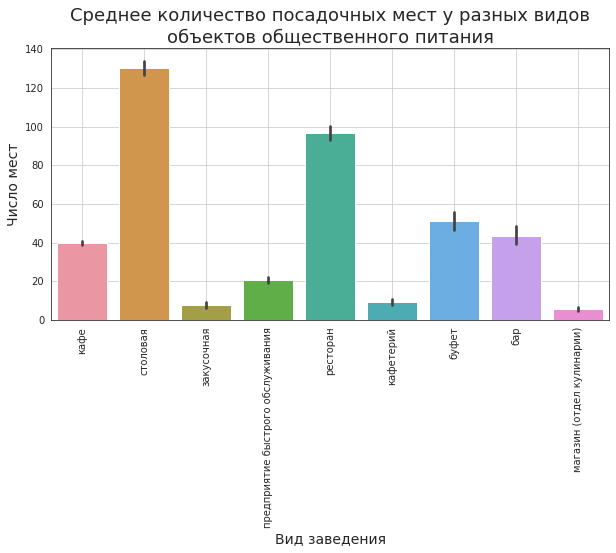

In [47]:
#построим график
plt.figure(figsize=(10,5))
sns.barplot(x='object_type',
            y='number',
            data=rest_data)
plt.grid(True)
plt.title('Среднее количество посадочных мест у разных видов\nобъектов общественного питания', fontsize=18)
plt.ylabel('Число мест', fontsize=14)
plt.xlabel('Вид заведения', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Диаграмма подтверждает выводы из сводной таблицы о том, что столовые и рестораны в среднем предоставляют наибольшее число посадочных мест. На третьем месте буфеты. Среднее количество посадочных мест в кафе и барах существенно не отличаются. Отделы кулинарии, как правило, посадочных мест практически не имеют (скорее всего, в них просто организованы столики для приема пищи стоя), что подтверждается диаграммой. 

### Диаграмма среднего количества посадочных мест в разбивке сетевых/не сетевых заведений

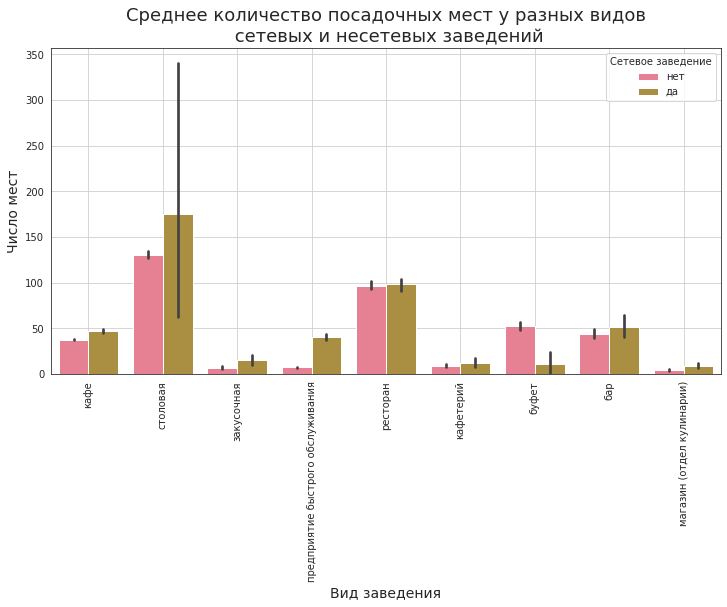

In [48]:
#построим график с разбивкой по сетевым-несетевым заведениям
plt.figure(figsize=(12,6))
sns.barplot(x='object_type',
            y='number',
            hue='chain',
            data=rest_data)
plt.grid(True)
plt.title('Среднее количество посадочных мест у разных видов\n сетевых и несетевых заведений', fontsize=18)
plt.ylabel('Число мест', fontsize=14)
plt.xlabel('Вид заведения', fontsize=14)
plt.legend(title='Сетевое заведение')
plt.xticks(rotation=90)
plt.show()

### Вывод
В среднем, наибольшее среднее число посадочных мест у столовых и ресторанов. При этом, у несетевых заведений среднее число посадочных мест в столовых значительно выше, чем у сетевых, а вот для ресторанов эти показатели примерно совпадают.

## Улицы и количество заведений

### Определение списка улиц с наибольшим количеством заведений

Рассмотрим улицы, на которых располагается наибольшее число объектов общественного питания

In [49]:
#извлечем улицу из адреса - напишем функцию
def get_street(address):
    #возьмем типы улиц с mosopen.ru
    road_types = [
        'аллея', 
        'бульвар',  
        'квартал', 
        'линия', 
        'набережная', 
        'переулок', 
        'площадь', 
        'проезд', 
        'проектируемый проезд', 
        'просека', 
        'проспект', 
        'тупик',
        'улица', 
        'шоссе']
    #сделаем split для ячейки с адресом, чтобы потом получить второй элемент (улицу)
    for street_part in address.split(','):
        #проверим, есть ли в выделенной части тип улично-дорожной сети 
        for road_type in road_types:
            #если есть  - выделяем часть адреса
            if road_type in street_part: 
                return street_part
    #если не нашли - возвращаем второй элемент
    return address.split(',')[1]
        

In [50]:
#применим функцию
rest_data['street_name'] = rest_data['address'].apply(get_street)


In [51]:
#используем метод str.strip() для обрезки символов с обоих концов строки
rest_data['street_name'] = rest_data['street_name'].str.strip()

In [52]:
#проверим, что получилось 
rest_data.head(10)

,id,object_name,chain,object_type,address,number,object_new_name,street_name
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,сметана,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,родник,улица Талалихина
2,24309,Кафе «Академия»,да,кафе,"город Москва, Абельмановская улица, дом 6",95,академия,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,пиццетория,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,вишневая метель,Абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,стол. при гоу сош № 1051,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,брусника,переулок Сивцев Вражек
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,мтуси,Авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,кпф семья-1,Авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,мтуси,Авиамоторная улица


Сгруппируем улицы по количеству объектов общественного питания. Определим 10 улиц с наибольшим числом объектов.

In [53]:
top_streets = (
    rest_data.groupby(['street_name'])
    .agg({'object_new_name': 'count'})
    .sort_values(by='object_new_name', ascending=False)
    .reset_index()
)

top_10_streets = top_streets[:10]
top_10_streets

,street_name,object_new_name
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,132
7,город Зеленоград,131
8,Кутузовский проспект,114
9,Каширское шоссе,112


### Диаграмма для топ-10 улиц

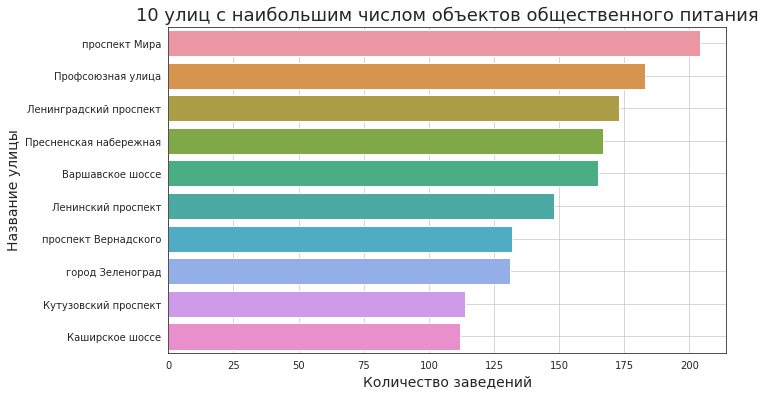

In [54]:
#построим график
plt.figure(figsize=(10,6))
sns.barplot(y='street_name',
            x='object_new_name',
            data=top_10_streets)
plt.grid(True)
plt.title('10 улиц с наибольшим числом объектов общественного питания', fontsize=18)
plt.ylabel('Название улицы', fontsize=14)
plt.xlabel('Количество заведений', fontsize=14)
plt.show()

Исходя из графика, на проспекте Мира наблюдается самое большое число объектов общественного питания. На втором месте - Профсоюзная улица. За ней следует Ленинградский проспект.

### Округа, в границах которых расположены улицы с наибольшим числом заведений

В Москве 12 округов, в которые входят 125 районов и 21 поселение.
- Административный округ – это вид территориального административного образования с собственным управлением. Он состоит из районов или поселений. Поэтому границы округов никогда не пересекаются.
- Район – это исторически сложившаяся территориальная единица, имеющая свои географические, исторические и архитектурные особенности. 
- Поселение – это новый вид территориальных городских единиц, которые появились в 2012 году после перепланировки и пересмотра границ столицы.

Для дальнейшего описание данных, будем использовать более употребляемое понятие "округ", т.к. районы чаще всего небольшие и крупные проспекты могут пересекать более 5 районов (и не более 2-3 округов). Кроме того, использование районов требует использования большего количества данных, чем одно название улицы (вывод о перспективности расположения заведений, тогда должен формулироваться также с учетом того, к какому району относится конкретный адрес, поскольку каждый из 125 районов Москвы иммет свои особенности).

In [55]:
#откроем внешний файл с районами и округами Москвы и сохраним его в отдельную переменную

spreadsheet_id = '11SLea41hG2paONvr3CzbmAP2qUXRHJ0_gew1LKn__5g'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts = pd.read_csv(BytesIO(r.content))

#переименуем столбец,чтобы он соотвествовал столбцу из ранее объявленной переменной
districts = districts.rename (columns= {'streetname': 'street_name'})
districts.head()

,street_name,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [56]:
#объединим таблицу с топ-10 улиц и районами
top_10_streets_merged = top_10_streets.merge(districts, on ='street_name', how='left')

In [57]:
#посмотрим на таблицу по районам
top_10_streets_merged.pivot_table(
    index='area', values='object_new_name', aggfunc='count'
).sort_values(by='object_new_name', ascending=False)

,object_new_name
area,
Район Проспект Вернадского,2
Донской район,2
Ломоносовский район,2
Обручевский район,2
Район Нагатино-Садовники,2
Район Теплый Стан,2
Район Тропарево-Никулино,2
Район Гагаринский,2
Район Фили-Давыдково,1


Как видно из таблицы, разбивка по районам не информативна - в подаваляющем большинстве случаев, на один район приходится одна улица. Округа являются более укрупненными. Построим сводную таблицу по ним. Будем учитывать, что числовые данные относительны, поскольку улицы могут попадать в несколько округов и дублироваться при подсчете.

In [58]:
top_10_streets_merged.pivot_table(
    index='okrug', values='object_new_name', aggfunc='count'
).sort_values(by='object_new_name', ascending=False).style.background_gradient('Blues')

,object_new_name
okrug,
ЮЗАО,14
ЮАО,11
ЗАО,7
СВАО,6
САО,4
Зеленоград,3
ЦАО,3


Топ-10 улиц расположены в 7 округах (из 12): СВАО, ЦАО, ЮЗАО, САО, ЮАО, ЗАО и Зеленоградский АО. Из топ-10 4 улицы расположены в двух и более округах. Больше всего улиц с наибольшим числом заведений расположены в южной части Москвы - Юго-западном и Южном административных округах. В Центральном округе меньше всего улиц с большим количеством заведений. Это исторический район города с небольшими улицами и переулками, на которых расположено большое количество объектов самого разного назначения: магазины бизнес-класса, деловые центры, исторические постройки, рестораны премиум-класса, авторские магазины и небольшие кафе.

Сравним распределение с общем количеством заведений по округам

In [59]:
#объединим данные о районах и исходную таблицу
rest_data_new = rest_data.merge(districts, on ='street_name', how='left')

In [60]:
#построим сводную таблицу и посчитаем доли по округам
rest_data_new_piv=rest_data_new.pivot_table(
    index='okrug', columns='chain', values='object_name', aggfunc='count'
).reset_index()

rest_data_new_piv['total'] = rest_data_new_piv['да']+rest_data_new_piv['нет']
rest_data_new_piv['% chain'] = rest_data_new_piv['да'] / rest_data_new_piv['total'] * 100
rest_data_new_piv['% no_chain'] = rest_data_new_piv['нет'] / rest_data_new_piv['total'] * 100
rest_data_new_piv.drop(['да', 'нет'], axis=1,  inplace=True)

rest_data_new_piv.style.background_gradient('Blues')

chain,okrug,total,% chain,% no_chain
0,ВАО,2148,18.761639,81.238361
1,ЗАО,2684,21.944858,78.055142
2,Зеленоград,843,15.539739,84.460261
3,САО,3448,25.174014,74.825986
4,СВАО,3304,22.215496,77.784504
5,СЗАО,1025,19.219512,80.780488
6,ЦАО,5877,19.142420,80.857580
7,ЮАО,4469,21.436563,78.563437
8,ЮВАО,1932,20.962733,79.037267
9,ЮЗАО,4082,22.684958,77.315042


В разбивке по общему числу заведений наоборот лидирует Центральный округ. В нем один из самых больших процентов несетевых заведений. Южный и Юго-Западный округа по общему числу заведений также находятся в лидерах.

### Улицы с 1 объектом

In [61]:
#выберем из сгруппированной ранее переменной только те улицы, на которых распложено одно заведение
one_object = top_streets[top_streets['object_new_name'] == 1].reset_index(drop=True)
print('Количество улиц с одним заведением:', one_object.shape[0])

Количество улиц с одним заведением: 573


In [62]:
#добавим к полученному списку сведения об округе
one_object = one_object.merge(districts, on ='street_name', how='left')
one_object

,street_name,object_new_name,areaid,okrug,area
0,улица Зенитчиков,1,88.00,СЗАО,Район Митино
1,5-й проезд Подбельского,1,22.00,ВАО,Район Богородское
2,5-й Монетчиковский переулок,1,14.00,ЦАО,Район Замоскворечье
3,Автомобильный проезд,1,117.00,ЮВАО,Нижегородский район
4,улица Гончарова,1,74.00,СВАО,Бутырский район
...,...,...,...,...,...
614,Янтарный проезд,1,76.00,СВАО,Лосиноостровский район
615,Егорьевский проезд,1,115.00,ЮВАО,Район Люблино
616,Ясногорская улица,1,134.00,ЮЗАО,Район Ясенево
617,Докучаев переулок,1,15.00,ЦАО,Красносельский район


In [63]:
#сгруппируем по округам
one_object_grouped = (
    one_object.groupby(['okrug'])
    .agg({'street_name' : 'count'})
    .sort_values(by='street_name', ascending=False)
    .reset_index()
)
one_object_grouped

,okrug,street_name
0,ЦАО,186
1,ВАО,72
2,СВАО,66
3,САО,55
4,ЮВАО,55
5,ЗАО,45
6,ЮАО,29
7,СЗАО,27
8,ЮЗАО,27
9,Зеленоград,5


573 улицы, на которых находится единственнный ресторан, расположены в 9 округах Москвы. Больше всего таких улиц в Центральном административном округе, меньше всего - в Зеленоградском АО.

### График распределения мест в заведениях на улицах с большим числом объектов

In [64]:
#создадим переменную, в которой объединим список улиц с наибольшим числом заведений с остальными данными из остальной таблицы
top_10_street_list = top_10_streets['street_name'].to_list()
objects_top_10_street = rest_data.query('street_name in @top_10_street_list').reset_index(drop=True)
objects_top_10_street.head()

,id,object_name,chain,object_type,address,number,object_new_name,street_name
0,155973,Кафе «Андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,андерсон,Варшавское шоссе
1,23618,Кафе «Subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,сабвей,Варшавское шоссе
2,155852,Кафе «Ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,ламаджо,Варшавское шоссе
3,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,шаурма в пите,Варшавское шоссе
4,120658,Выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,выпечка,Варшавское шоссе


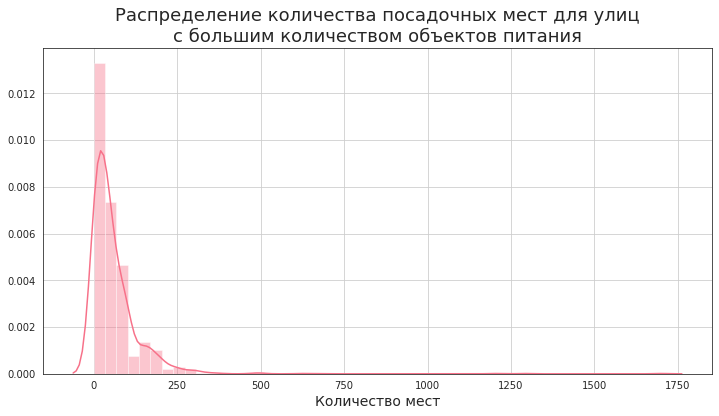

In [65]:
#построим график распределения мест в заведениях на улицах с большим числом объектов
plt.figure(figsize=(12, 6))
sns.distplot(objects_top_10_street['number'], bins=50) 
plt.grid(True)
plt.title('Распределение количества посадочных мест для улиц\nс большим количеством объектов питания', fontsize=18)
plt.ylabel('')
plt.xlabel('Количество мест', fontsize=14)
plt.show()

Исходя из графика - заведения с меньшим количеством мест встречаются чаще, чем с большим. Чаще всего встречаются объекты с посадочными местами от 0 до 100. Единичные заведения имеют места от 250 и более.

### Диаграммы размаха

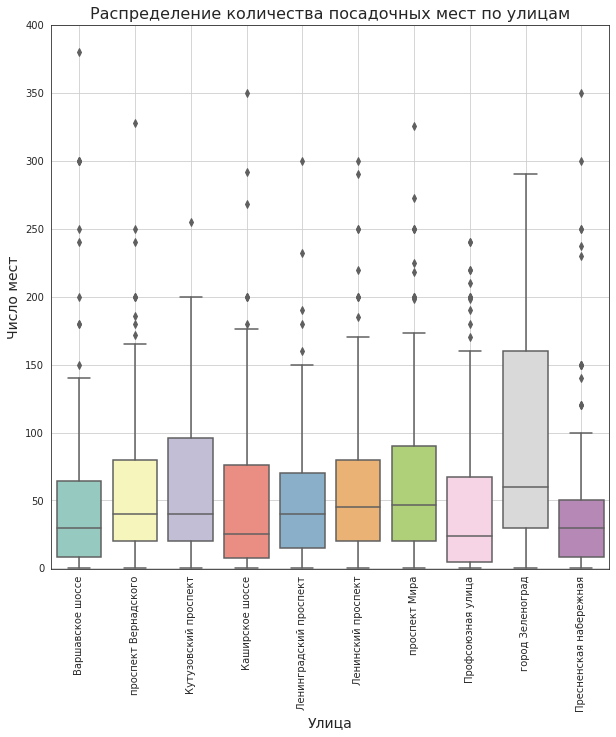

In [66]:
#построим диаграмму размаха по 10 самым популярным улицам
plt.figure(figsize=(10, 10))
sns.boxplot(x='street_name', y='number', data=objects_top_10_street, palette='Set3')
plt.title('Распределение количества посадочных мест по улицам', fontsize=16)
plt.ylabel('Число мест', fontsize=14)
plt.grid(True)
plt.ylim(-0.25,400) #немного обрежем выбросы
plt.xlabel('Улица', fontsize=14)
plt.xticks(rotation=90)
plt.show()


Исходя из диаграммы размаха, среди заведений, расположенных на топ-10 улиц, медианное значение мест колеблется чуть ниже 50. На диаграмме много выбросов, что говорит о том, что на каждой улице есть отдельные крупные заведения с большим числом мест. Так, популярность Пресненской набережной, высока именно за счет таких заведений (на диаграмме - маленький ящик и много выбросов). Тогда как в Зеленограде большое количество заведений с самым разным количеством мест (большой бокс, длинный ус, мало выбросов).

In [67]:
#добавим округ к таблице
objects_top_10_street_merged = objects_top_10_street.merge(districts, on='street_name', how='left')

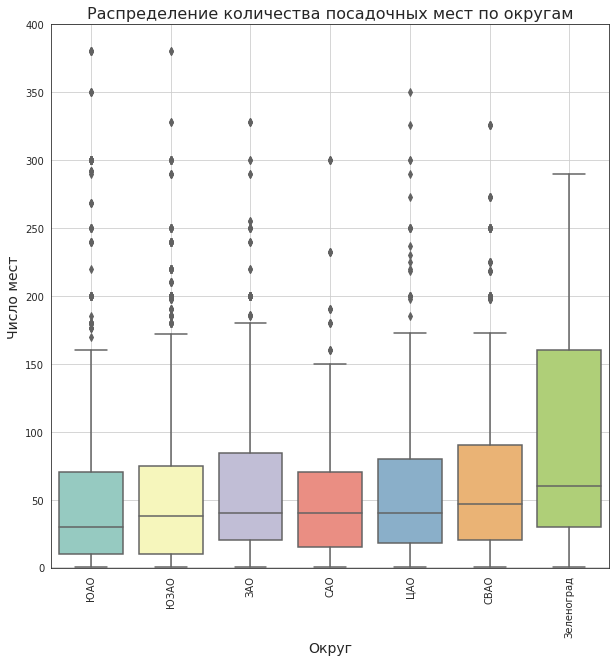

In [68]:
#построим аналогичную диаграмму размаха по округам
plt.figure(figsize=(10, 10))
sns.boxplot(x='okrug', y='number', data=objects_top_10_street_merged, palette='Set3')
plt.title('Распределение количества посадочных мест по округам', fontsize=16)
plt.grid(True)
plt.ylim(-0.25,400) #немного обрежем выбросы
plt.ylabel('Число мест', fontsize=14)
plt.xlabel('Округ', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Распределение по округам имеет ту же тенденцию, что и по улицам. Большое количество выбросов в каждом округе говорит о наличии отдельных крупных заведений. Медианное значение посадочных мест превышает 50 только в Зеленограде. По остальным округам оно по большей части чуть ниже 50. Зеленоград также является самым стабильным по сренему количеству посадочных мест в заведениях.

## Срез по кафе

Инвестор планирует открыть в Москве инновационное кафе с перспективой выхода на рынок сетевых заведений. Сделаем срез отдельно по кафе и построим графики.

In [69]:
cafe = rest_data.query('object_type == "кафе"')

In [70]:
#построим таблицу с разбивкой по количеству заведений и средним количеством мест
#в строках выведем признак сети
qty_cafe = (
    cafe.pivot_table(
    index='chain', values='id', aggfunc='count', margins=True)
    .reset_index()
    .rename(columns={'id':'counts'})
)
qty_cafe

,chain,counts
0,да,1397
1,нет,4702
2,All,6099


Не сетевых кафе в 3 раза больше, чем сетевых. В среднем, количество посадочных мест составляет около 40.

Посмотрим на улицы с наибольшим количеством кафе.

In [71]:
#построим сводную таблицу по улицам, оставим для вывода строки с 1(вкл.) по 11 (не вкл.), т.к. на 0 значении будет выведена общая сумма
top_streets_cafe = cafe.pivot_table(
    index='street_name', 
    columns='chain',
    values='id', 
    aggfunc='count',
    margins=True
).sort_values(by='All', ascending=False).reset_index()

top_streets_cafe[1:11].style.background_gradient('Blues')

chain,street_name,да,нет,All
1,проспект Мира,33.000000,70.000000,103
2,Пресненская набережная,29.000000,69.000000,98
3,Профсоюзная улица,30.000000,60.000000,90
4,Ленинградский проспект,36.000000,34.000000,70
5,Варшавское шоссе,14.000000,52.000000,66
6,Ленинский проспект,20.000000,44.000000,64
7,улица Ленинская Слобода,5.000000,58.000000,63
8,улица Земляной Вал,27.000000,32.000000,59
9,улица Сущёвский Вал,5.000000,51.000000,56
10,Ленинградское шоссе,11.000000,45.000000,56


Проспект Мира (проходит через ЦАО с СВАО), Профсоюзная улица (ЮЗАО), Пресненская набережная (ЦАО) являются лидерами по количеству кафе (как сетевых, так и не сетевых). 

Посмотрим в каких округах находятся эти улицы

In [72]:
#сохраним топ-10 в отдельную переменную и добавим к ним районы
top_list_cafe = top_streets_cafe[1:11]
top_list_cafe = top_list_cafe.merge(districts, on=['street_name'], how='left').reset_index()

In [73]:
#построим сводную таблицу
top_list_cafe.pivot_table(index=['okrug'], values='street_name', aggfunc='count').sort_values(by='street_name', ascending=False)

,street_name
okrug,
ЮЗАО,12
САО,9
ЮАО,8
СВАО,7
ЦАО,7
ЗАО,2
Зеленоград,1


Улицы с наибольшим числом кафе, проходят через Юго-западный, Северный и Южный округа, так же как и при исследовании всех видов заведений. Однако в срезе данных по кафе Центральный округ совсем немного меньше по количеству улиц с большим числом заведений.

Оценим среднее количество мест в кафе по крупным улицам

In [74]:
#получим список топовых улиц
top_streets_cafe_list = top_streets_cafe[1:11]
top_streets_cafe_list = top_streets_cafe_list['street_name'].to_list()

#получим список кафе на топовых улицах
top_streets_cafe_num = cafe.query('street_name in @ top_streets_cafe_list')

#построим сводную таблицу по числу мест на них
top_streets_cafe_num.pivot_table(
    index='street_name', 
    columns='chain',
    values='number', 
    aggfunc='mean',
    margins=True
).style.background_gradient('Blues')

chain,да,нет,All
street_name,,,
Варшавское шоссе,42.285714,40.365385,40.772727
Ленинградский проспект,35.361111,37.764706,36.528571
Ленинградское шоссе,35.818182,37.933333,37.517857
Ленинский проспект,46.950000,34.000000,38.046875
Пресненская набережная,34.758621,35.521739,35.295918
Профсоюзная улица,56.800000,32.533333,40.622222
проспект Мира,69.424242,54.100000,59.009709
улица Земляной Вал,46.444444,38.687500,42.237288
улица Ленинская Слобода,54.600000,20.517241,23.222222


Среднее число мест в кафе на улицах с самым большим числом кафе - от 59 до 23. В сетевых заведениях этот показатель стартует с 69, в среднем составляет около 48 мест. В несетевых - от 54, в среднем около 35.

In [75]:
one_cafe_street = top_streets_cafe.query('All == 1')
print('По одному кафе на следующем количестве улиц:', one_cafe_street['street_name'].count())

По одному кафе на следующем количестве улиц: 514


Посмотрим, в каких округах находятся улицы с одним кафе

In [76]:
#создадим для таких улиц переменную, объединим с районами
one_cafe_street_list = one_cafe_street['street_name'].to_list()
one_cafe_street_merged = cafe.query('street_name in @one_cafe_street_list')
one_cafe_street_merged = one_cafe_street_merged.merge(districts, on='street_name', how='left')

In [77]:
#выберем топ-10 районов, в которых находятся улцы с 1 кафе
one_cafe_street_merged.pivot_table(
    index='area', 
    values='id', 
    aggfunc='count',
).sort_values(by='id', ascending=False).reset_index().head(10)

,area,id
0,Тверской район,30
1,Район Хамовники,24
2,Басманный район,23
3,Пресненский район,21
4,Таганский район,20
5,Район Арбат,16
6,Район Замоскворечье,11
7,Даниловский район,11
8,Мещанский район,10
9,Красносельский район,10


В Тверском районе самая большая конкуренция авторских кафе.

In [78]:
# построим сводную таблицу по округам
one_cafe_street_piv = one_cafe_street_merged.pivot_table(
    index='okrug', 
    values='id', 
    aggfunc='count',
).sort_values(by='id', ascending=False).reset_index()

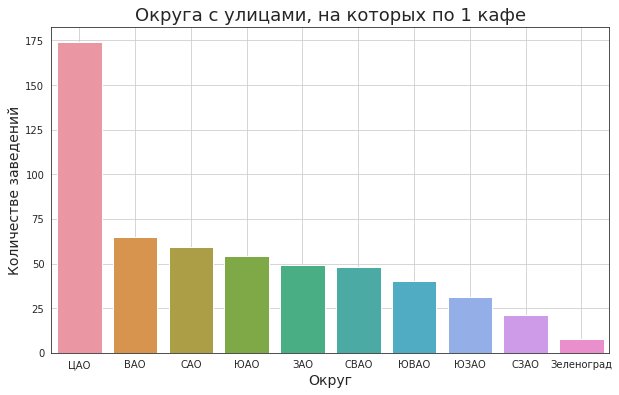

In [79]:
#построим график
plt.figure(figsize=(10,6))
sns.barplot(y='id',
            x='okrug',
            data=one_cafe_street_piv)
plt.grid(True)
plt.title('Округа с улицами, на которых по 1 кафе', fontsize=18)
plt.ylabel('Количестве заведений', fontsize=14)
plt.xlabel('Округ', fontsize=14)
plt.show()

В лидерах - Центральный административный округ. По остальным округам количество улиц плавно убывает.

## Вывод

1. В результате предобработки данных были внесены изменения для сетевых заведений: наименования унифицированы, для наименований, совпавших с несетевыми - исправлен признак сети на "да". В обработанной таблице получено 191 уникальное наименование сетей объектов питания.
2. Наиболее распространенными заведениями являются кафе (40% от общего числа, распространены как в сетевом, так и не сетевом вариантах), столовые (17% от общего числа, в сетевом варианте не представлены вообще), рестораны (15%)и фастфуды (12,5% от общего числа заведений, в сетевом варианте опережают рестораны по количеству).
3. 30% сетевых заведений имеют более 8 объектов. У половины от общего числа сетей - больше 5 объектов.
4. Почти 50% сетевых заведений имеют в среднем больше 45 посадочных мест. У двух сетей из 191 посадочные места не предусмотрены.
5. Все сети были разделены на 4 категории: много заведений-много мест, много заведений-мало мест, мало заведений-много мест, мало заведений-мало мест, где много заведений - это больше 5 объектов, а много мест - это больше 45 посадочных мест.
6. Самой распространенной категорией являются сети, в которых мало объектов, но много посадочных мест. В целом, для сетевых заведений характерно около 8 заведений и около 50 посадочных мест. 
7. Большое количество посадочных мест (в сетевом и не сетевом вариантах) в среднем характерно для столовых (130 мест) и ресторанов (97 мест). 
8. Самое большое число заведений расположено на проспекте Мира, Профсоюзной улице, Ленинградском проспекте, Пресненской набережной, Варшавском шоссе, Ленинском проспекте, проспекте Вернадского, городе Зеленограде, Кутузовском проспекте, Каширском шоссе. Все это - крупные магистрали, связывающие районы Москвы. 
9. Топ-10 улиц расположены в 7 округах (из 12): СВАО, ЦАО, ЮЗАО, САО, ЮАО, ЗАО и Зеленоградский АО. Причем наибольше количество заведений на южной оконечности Москвы - Юго-Западном и Южном округах. Некторые крупные улицы явялются узловыми и проходят через несколько округов.
10. Чуть меньше чем на 30% улиц расположен всего 1 объект общественного питания (от общего количества улиц с объектами общественного питания Москвы).
11. В Центральном округе больше всего улиц с 1 заведением. Центральный округ охватывает исторический центр, районы трех вокзалов, богат на небольшие улочки и переулки.
12. На тех улицах, на которых больше всего заведений, самыми распространенными являются те, у которых от 0 до 50 посадочных мест. В среднем, в объектах общественного питания около 40 посадочных мест.
13. На каждой из улиц (и округов) с наибольшим числом объектов, имеются отдельные заведения с большим количеством посадочных мест. Такие заведения существенно влияют на распределение мест в объектах общественного питания. По большей части, максимум посадочных мест в заведениях по округам - чуть ниже 200. Самые типовые заведения - в Зеленограде.

### Рекомендации

<b>План:</b> открыть инновационное кафе с перспективой сетевого развития.

<b>Факты:</b>  Кафе является популярным видом объектов питания. В Москве - это самый распространненный вид заведения (почти 40% всех представленных объектов) как среди сетевых, так и среди не сетевых заведений. Больше всего распространены не сетевые заведения (их в 3 раза больше сетевых).<br>
Улицы с наибольшим числом заведений располагаются в 7 округах. Из которых самыми значимыми являются ЮЗАО, САО и ЮАО. В тоже время, по СВАО и ЦАО разница от лидера составляет всего 1 улицу (в отличие от исследования по всем видам заведений). <br>
На проспекте Мира в средем предлагается больше всего посадочных мест (как у сетевых (69), так и у не сетевых кафе(54). Среднее число посадочных мест по кафе на улицах с большим числом заведений - около 40 (минимум 23).<br>
В Центральном административном округе больше всего улиц, на которых расположено 1 заведение.

<b>Рекомендации:</b> по имеющимся данным, на первом этапе открывать инновационное кафе лучше в Центральном административном округе - в нем больше улиц, на которых не будет конкуренции, мало сетевых и много авторских предложений. Центральный район охватывает деловой центра Москва-сити и перспективен для проведения бизнес-ланчей, организации мест для бранчей под деловые встречи и отдыха сотрудников компаний, арендующих офисы в престижном деловом центре. Лучше открыть небольшое заведение с числом мест около 35. В перспективе расшириться до 5 заведений с 50 посадочными местами в направлении Юго-Западного и Южного административного округов (как крупнейших по количеству населения).<br>
Однако в отсутствие данных о среднем чеке, проходимости сетевых и не сетевых кафе в разных районах города, отсуствии портрета аудитории, на которую предполагается ориентировать предложение рекомендации можно дать только в маккимально общем виде. Кроме того, потребуется изучить также пешую и транспортную доступность выбранного метоположения.


## Презентация для инвесторов

Презентация: <https://disk.yandex.ru/d/GwSHmCpbxqL9NQ>